In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess images using the data generator
image_folder = '/content/drive/MyDrive/REX Technologies/img_align_celeba'
# Load the CSV file with image labels (-1 for female, 1 for male)
label_file_path = '/content/drive/MyDrive/REX Technologies/list_attr_celeba.csv'  # Replace with the path to your CSV file
df = pd.read_csv(label_file_path)
df = df.iloc[0:5000,]
df['img_path'] = "/content/drive/MyDrive/REX Technologies/img_align_celeba/" + df["image_id"]

In [4]:
df['img_path']

0       /content/drive/MyDrive/REX Technologies/img_al...
1       /content/drive/MyDrive/REX Technologies/img_al...
2       /content/drive/MyDrive/REX Technologies/img_al...
3       /content/drive/MyDrive/REX Technologies/img_al...
4       /content/drive/MyDrive/REX Technologies/img_al...
                              ...                        
4995    /content/drive/MyDrive/REX Technologies/img_al...
4996    /content/drive/MyDrive/REX Technologies/img_al...
4997    /content/drive/MyDrive/REX Technologies/img_al...
4998    /content/drive/MyDrive/REX Technologies/img_al...
4999    /content/drive/MyDrive/REX Technologies/img_al...
Name: img_path, Length: 5000, dtype: object

In [8]:
# Define image and batch parameters
image_size = (64, 64)
batch_size = 32

# Split data into training (60%), validation (20%), and test (20%) sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, validation_df = train_test_split(train_df, test_size=0.25, random_state=42)

# Convert integer labels to strings
train_df['Male'] = train_df['Male'].astype(str)
validation_df['Male'] = validation_df['Male'].astype(str)
test_df['Male'] = test_df['Male'].astype(str)

# Create data generator for image loading and resizing
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
)


train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_folder,
    x_col='img_path',
    y_col='Male',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory=image_folder,
    x_col='img_path',
    y_col='Male',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_folder,
    x_col='img_path',
    y_col='Male',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
)

Found 3000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


In [9]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1
)
model.save("/content/drive/MyDrive/REX Technologies/CNN_model_save/gender_classification_cnn_model_1.h5")
# Evaluate the model on the test set
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

Epoch 1/10
94/94 [==============================] - 908s 10s/step - loss: 0.5744 - accuracy: 0.6950 - val_loss: 0.4587 - val_accuracy: 0.8020
Epoch 2/10
94/94 [==============================] - 29s 306ms/step - loss: 0.3431 - accuracy: 0.8520 - val_loss: 0.2891 - val_accuracy: 0.8720
Epoch 3/10
94/94 [==============================] - 33s 350ms/step - loss: 0.2123 - accuracy: 0.9143 - val_loss: 0.2464 - val_accuracy: 0.9020
Epoch 4/10
94/94 [==============================] - 31s 333ms/step - loss: 0.1551 - accuracy: 0.9460 - val_loss: 0.2293 - val_accuracy: 0.9100
Epoch 5/10
94/94 [==============================] - 32s 341ms/step - loss: 0.1188 - accuracy: 0.9550 - val_loss: 0.2127 - val_accuracy: 0.9220
Epoch 6/10
94/94 [==============================] - 32s 342ms/step - loss: 0.0948 - accuracy: 0.9640 - val_loss: 0.2133 - val_accuracy: 0.9180
Epoch 7/10
94/94 [==============================] - 39s 419ms/step - loss: 0.0626 - accuracy: 0.9803 - val_loss: 0.3682 - val_accuracy: 0.8970


Accuracy: 0.93
F1 Score: 0.91
Recall: 0.89
Confusion Matrix:
[[564  27]
 [ 44 365]]


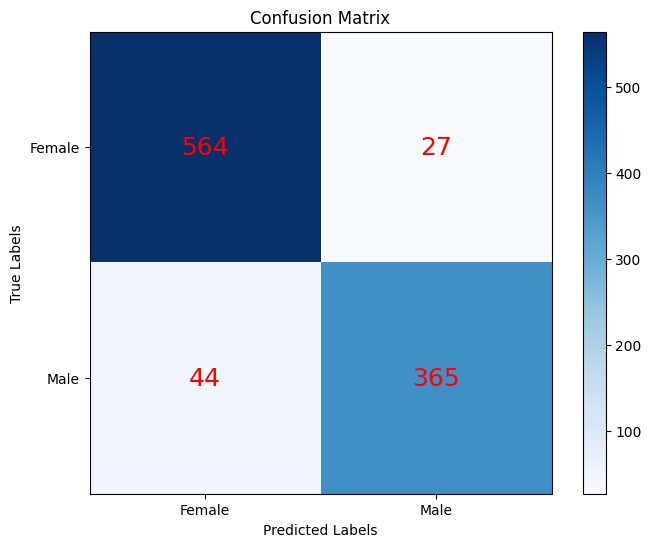

In [11]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(confusion)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks([0, 1], ['Female', 'Male'])
plt.yticks([0, 1], ['Female', 'Male'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='red', fontsize=18)
plt.show()